In [1]:
# データセット
from sklearn.datasets import load_boston

# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split

In [22]:
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers, callbacks
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras import regularizers

boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)

bostondata_std = scipy.stats.zscore(boston.data)

df_new = df.rename(columns={'CRIM': '犯罪率','ZN': '広い家の割合','INDUS': '非小売業の割合','CHAS': '川の隣か','NOX': '一酸化窒素濃度','RM': '部屋数','AGE': '年数','DIS': '施設への距離','RAD': '高速道路への距離','TAX': '固定資産税率','PTRATIO': '先生:生徒', 'B': '黒人率','LSTAT': '低所得者人口割合'})
df_all = df_new
df_all['価格[$1,000]'] = pd.Series(boston.target)
df_all
                  
                  

,犯罪率,広い家の割合,非小売業の割合,川の隣か,一酸化窒素濃度,部屋数,年数,施設への距離,高速道路への距離,固定資産税率,先生:生徒,黒人率,低所得者人口割合,"価格[$1,000]"
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


/Users/koichi.takahashi/Documents/内定者インターン/売上予測モデル/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29359 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/koichi.takahashi/Documents/内定者インターン/売上予測モデル/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/koichi.takahashi/Documents/内定者インターン/売上予測モデル/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/koichi.takahashi/Documents/内定者インターン/売上予測モデル/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/koichi.takahashi/Documents/内定者インターン/売上予測モデル/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: Runtime

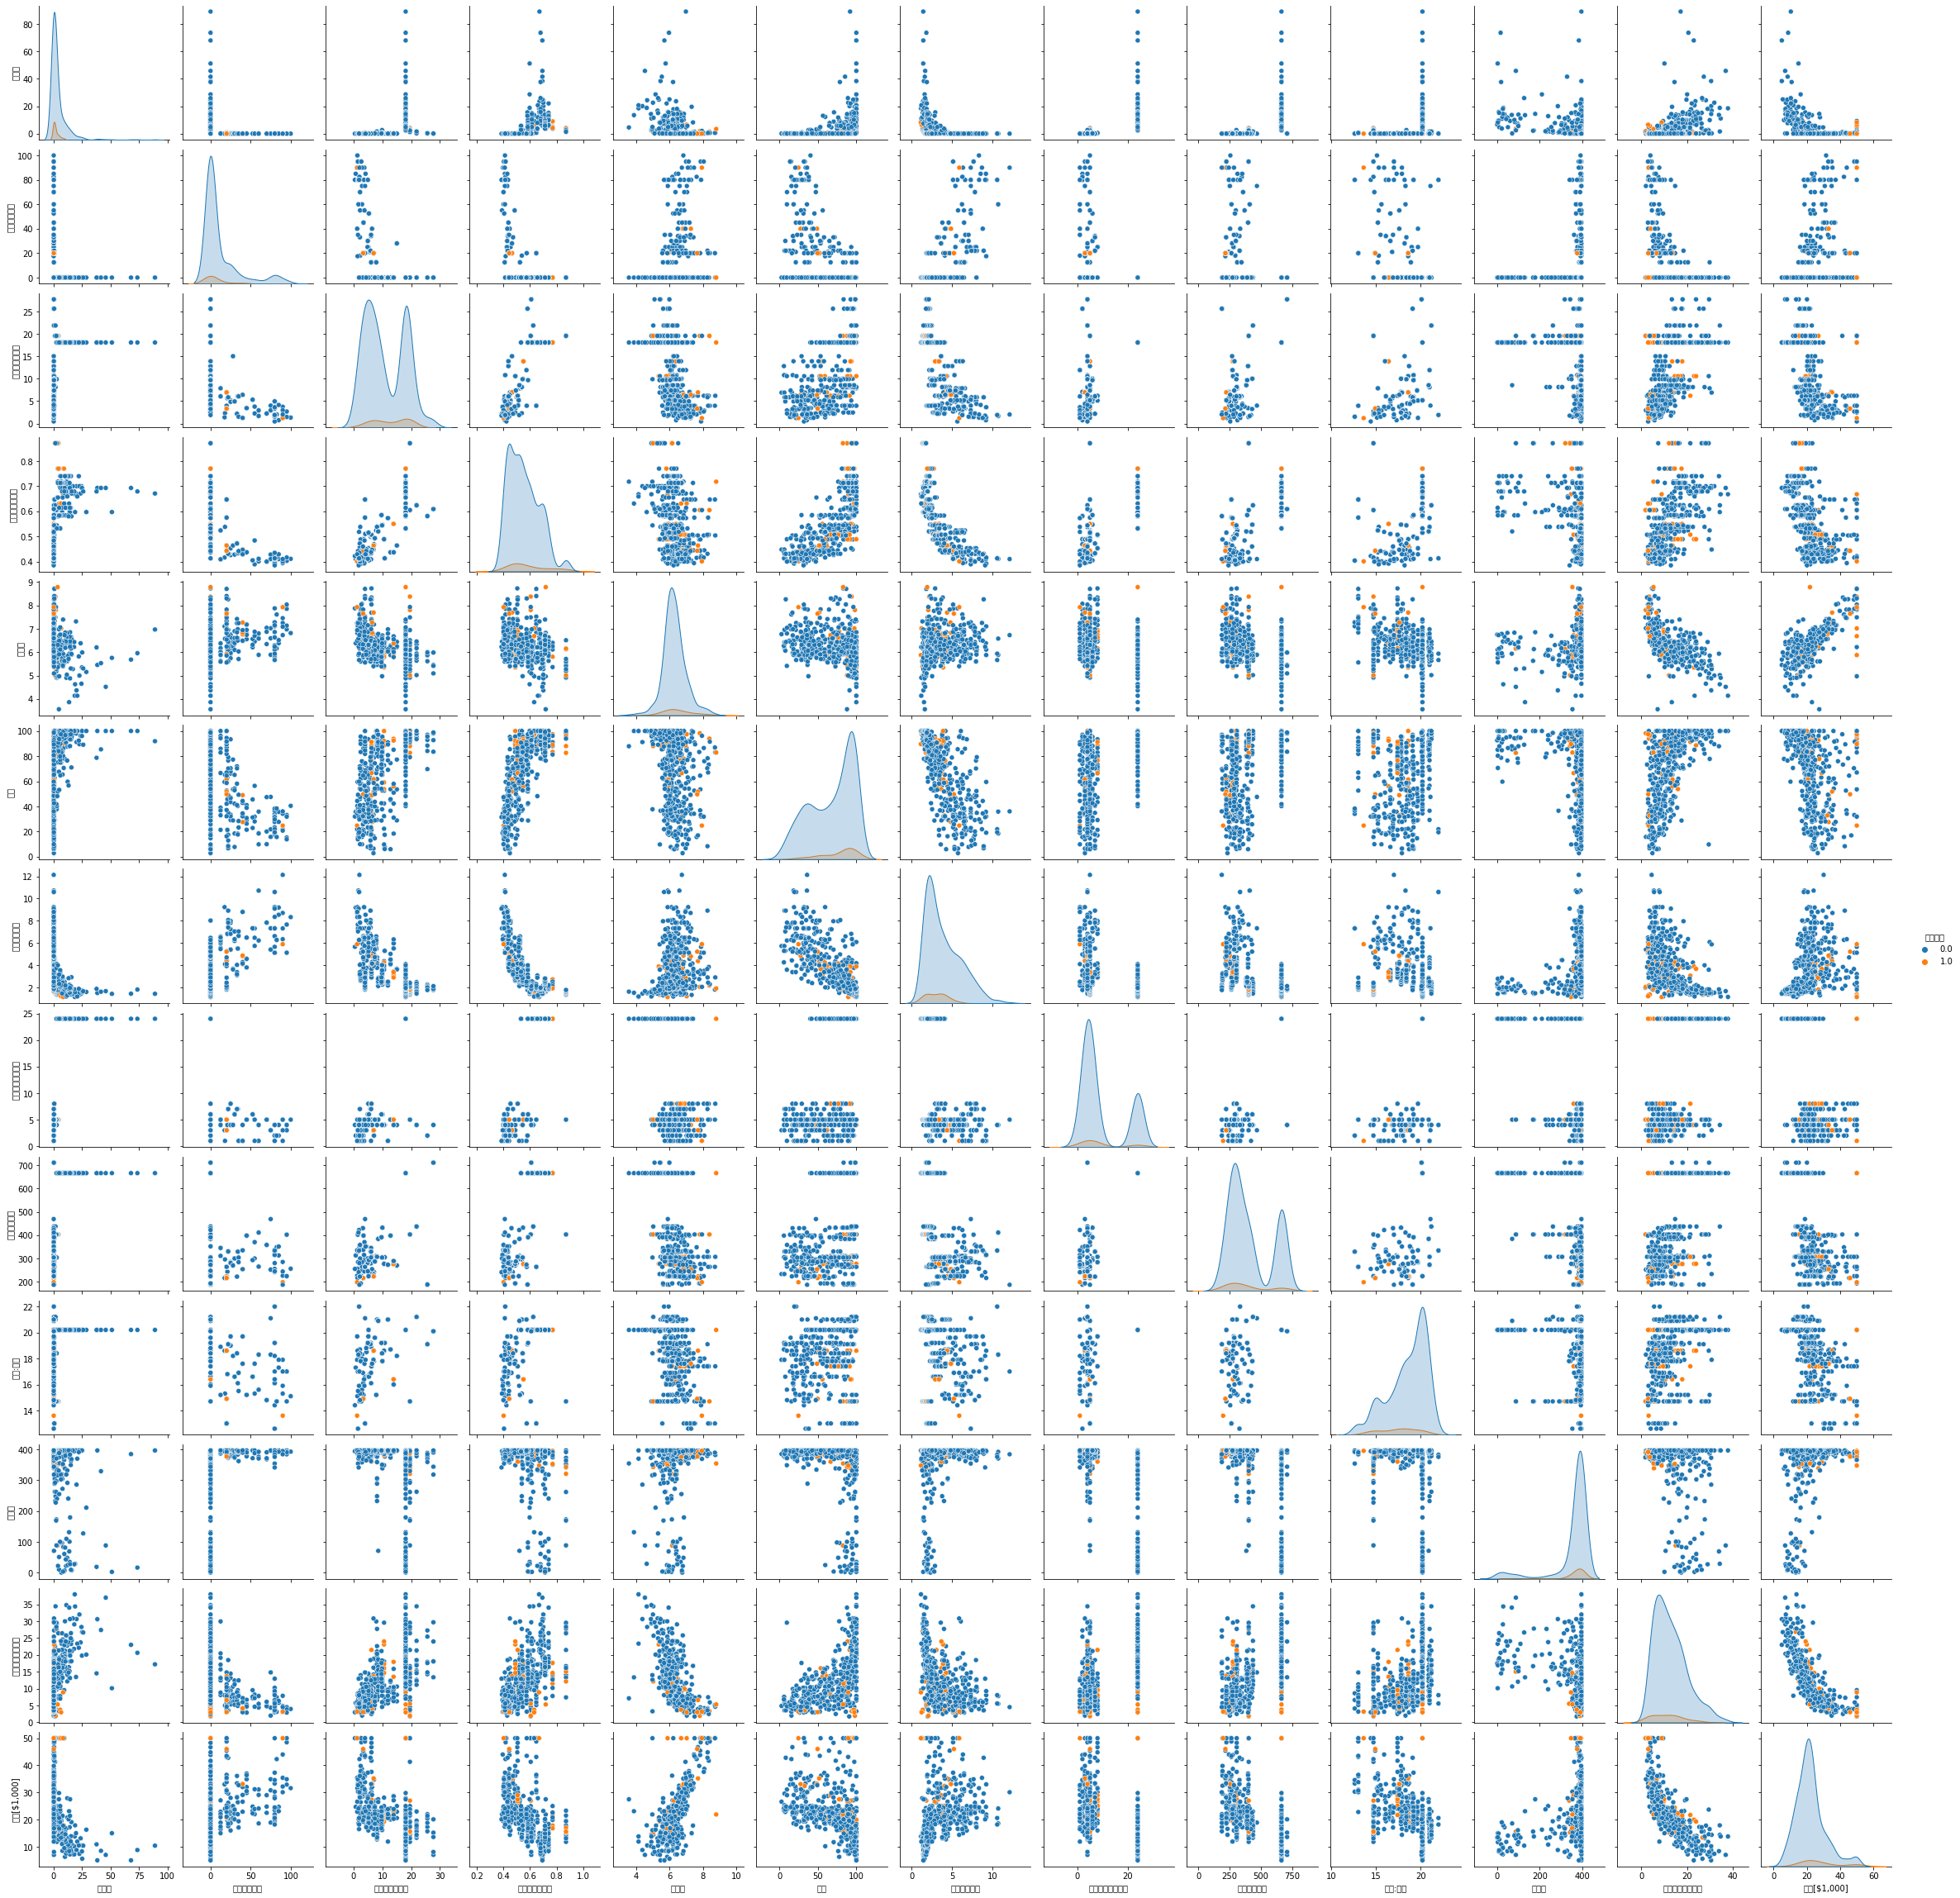

In [24]:
sns.pairplot(df_all, hue="川の隣か").savefig('boston_pairplot.png')

4/4 [==============================] - 0s 693us/step - loss: 21.5885
loss: 21.59%


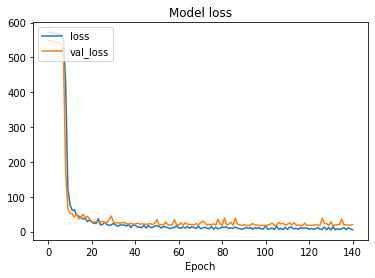

4/4 [==============================] - 0s 1ms/step - loss: 8.5466
loss: 8.55%


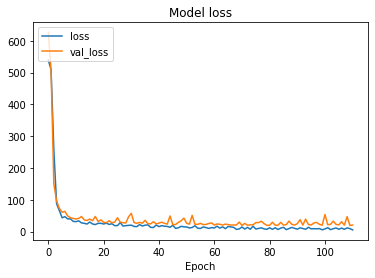

4/4 [==============================] - 0s 1ms/step - loss: 16.4724
loss: 16.47%


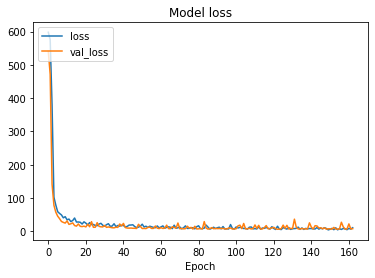



================total_score================

loss:15.54% (+/- 5.37%)


In [6]:
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(bostondata_std, boston.target, test_size=0.25,random_state=12)

#k分割
X = X_train
Y = y_train

loss_cvscores = []
acc_cvscores = []

#k分割
from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits=3, shuffle=True)#random_state=1234


    #モデル作成
for train, test in kf.split(X,Y):
    model = Sequential()
    model.add(Dense(100, input_dim=13, kernel_initializer='glorot_uniform', activation='relu'))#kernel_regularizer=regularizers.l2(0.02)
    model.add(Dense(100, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(100, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(50, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(50, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(50, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(50, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(50, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(50, kernel_initializer='glorot_uniform', activation='relu'))
    
    model.add(Dense(25, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(25, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(25, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(25, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(25, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(25, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(25, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(25, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(25, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(25, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='glorot_uniform'))
    
    # 学習設定
    rmsprop = optimizers.RMSprop(lr=0.0005, rho=0.9, epsilon=None, decay=0.0)

    model.compile(optimizer=rmsprop,
                  loss='mse')
    
    # callback
    es_cb = callbacks.EarlyStopping(monitor='val_loss', patience=40, verbose=0, mode='auto')
    
    #モデル訓練    
    history = model.fit(X[train], Y[train], epochs=500, batch_size=32, verbose=0, validation_split=0.25, callbacks=[es_cb])
    
    # 評価
    scores = model.evaluate(X[test], Y[test], batch_size=32, verbose=1)
    print("%s: %.2f%%" % (model.metrics_names[0], scores))
          
    loss_cvscores.append(scores)
     
    # loss画像のプロット先の準備
    loss_fig = plt.figure()
    plt.plot(history.epoch,history.history['loss'], label="loss")
    plt.plot(history.epoch,history.history['val_loss'], label="val_loss")
    plt.title('Model loss')
    plt.ylabel('')
    plt.xlabel('Epoch')
    #plt.legend(['loss'], loc='upper left')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()
    
    
print("\n\n================total_score================\n")    
print("%s:%.2f%% (+/- %.2f%%)" % (model.metrics_names[0], np.mean(loss_cvscores), np.std(loss_cvscores)))



In [7]:
acc_df = pd.DataFrame(model.predict(X_test))
acc_df['']=y_test
acc_df


,0,
0,21.410028,20.7
1,15.774923,12.7
2,4.667405,8.5
3,26.982176,25.1
4,24.226442,28.2
...,...,...
122,22.753183,24.4
123,39.956917,46.7
124,27.656820,29.0
125,23.507742,24.1


In [8]:
from sklearn.metrics import r2_score

for i,s in enumerate(model.predict(X_test)):
    #print(str(((y_test[i] - s[0])/y_test[i]*100)) +'%')

    
    


SyntaxError: unexpected EOF while parsing (<ipython-input-8-eb92f1c61fce>, line 7)

In [9]:
r2 = r2_score(y_test, np.array(acc_df[0]))
r2

NameError: name 'r2_score' is not defined

In [106]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, np.array(acc_df[0]))
mae

3.3419326316653275

In [81]:
model.predict(X_test)[2][0]

24.805555

In [41]:
import pandas as pd
# データ分割（訓練データとテストデータ）のための関数
from sklearn.model_selection import train_test_split
# 重回帰モデリングのためのクラス
from sklearn.linear_model import LinearRegression

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(bostondata, boston.target, test_size=0.25,random_state=0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train, y_train)

print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

# 回帰係数と切片
print('\n回帰係数\n{}'.format(pd.Series(model.coef_)))
print('切片: {:.3f}'.format(model.intercept_))

決定係数(train):0.770
決定係数(test):0.635

回帰係数
0    -1.011704
1     1.025581
2    -0.039532
3     0.607312
4    -1.804680
5     2.645523
6    -0.197836
7    -3.018615
8     2.088382
9    -1.902129
10   -2.131546
11    0.770171
12   -3.560700
dtype: float64
切片: 22.409


In [65]:
model.predict(X_test)[0]

24.952332833349022

In [48]:
model.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

/Users/koichi.takahashi/Documents/内定者インターン/売上予測モデル/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


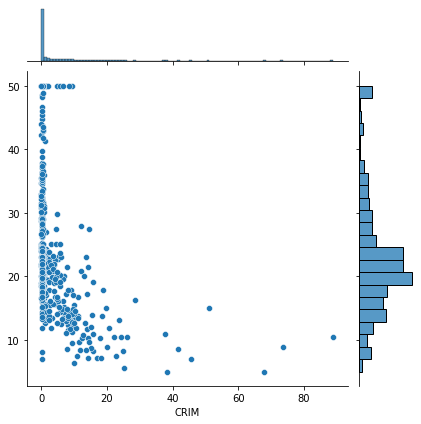

In [19]:
sns.jointplot(df['CRIM'], boston.target, data=df)

In [18]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
